# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [2]:
dataset_train = get_dataset("/home/workspace/data/train/*.tfrecord")
dataset_val   = get_dataset("/home/workspace/data/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    # TODO - Your implementation here
    
    
    # assign color map: cars[red], pedestrains[green], cyclists[blue]
    obj_color_map               = {1: [1,0,0], 2: [0,1,0], 4: [0,0,1]}
    
    
    # bbox and class
    groundtruth_bbox_train      = batch["groundtruth_boxes"].numpy()
    groundtruth_obj_class_train = batch["groundtruth_classes"].numpy()

    Train_image                 = batch["image"].numpy()
    
    fig, ax = plt.subplots()
        
    for bbx_train, class_train in zip(groundtruth_bbox_train,groundtruth_obj_class_train):
        ymin, xmin, ymax, xmax = bbx_train
        
        bbx_xy_train = (xmin*Train_image.shape[1], ymin*Train_image.shape[0])
        bbx_width    = (xmax-xmin)*Train_image.shape[1]
        bbx_height   = (ymax-ymin)*Train_image.shape[0]
        rec_train    = patches.Rectangle((bbx_xy_train),bbx_width,bbx_height,facecolor = 'none', edgecolor = obj_color_map[class_train])
        ax.add_patch(rec_train)
        
    ax.imshow(Train_image)


<Figure size 720x720 with 0 Axes>

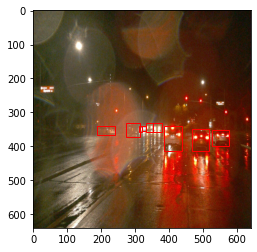

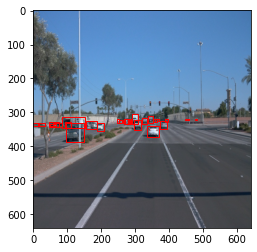

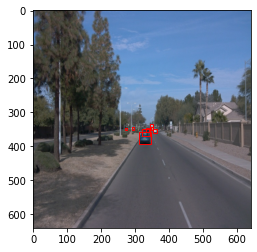

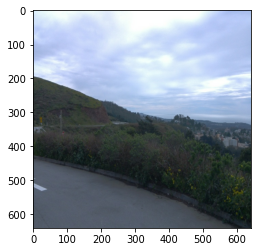

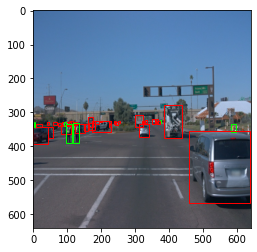

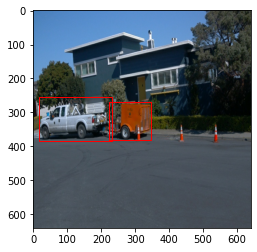

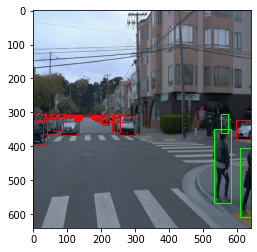

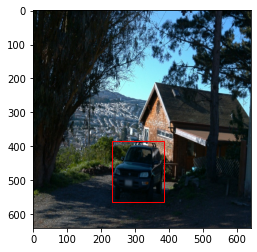

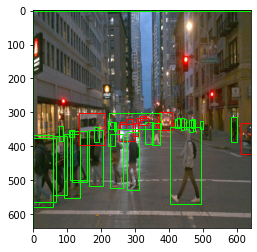

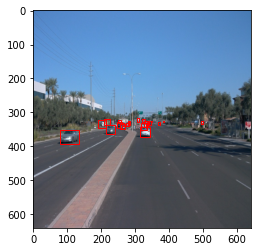

In [4]:
# plot
plt.figure(figsize = (10,10))

for idx in dataset_train.shuffle(50).take(10):
    display_images(idx)
    
plt.show()
    
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
# Statistic Analysis of dataset
    # Analyze how many cars/pedestrains/cyclists are in the train/validation test set

groundtruth_obj_class_train = {1: 0, 2: 0, 4: 0}
    
for batch in dataset_train.take(10000):
    for ii in batch["groundtruth_classes"].numpy():
        groundtruth_obj_class_train[ii] += 1       
        
groundtruth_obj_class_train


{1: 173731, 2: 48988, 4: 1248}

In [6]:
groundtruth_obj_class_Val   = {1: 0, 2: 0, 4: 0}

for batch in dataset_val.take(10000):
    for ii in batch["groundtruth_classes"].numpy():
        groundtruth_obj_class_Val[ii] += 1 

groundtruth_obj_class_Val        

{1: 250264, 2: 104553, 4: 2828}

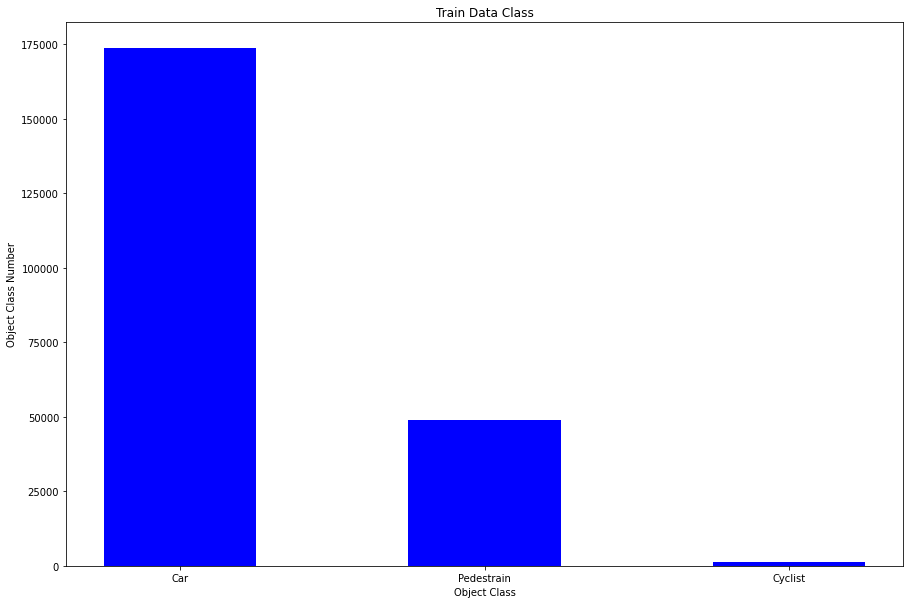

In [7]:
# bar plot of object numbers
obj_classes      = ['Car','Pedestrain', 'Cyclist']
Obj_classes_num  = [groundtruth_obj_class_train[1], groundtruth_obj_class_train[2], groundtruth_obj_class_train[4]] 
fig = plt.figure(figsize = (15,10))
plt.bar(obj_classes, Obj_classes_num, color = 'blue', width = 0.5)
plt.xlabel("Object Class")
plt.ylabel("Object Class Number")
plt.title("Train Data Class")

plt.show()



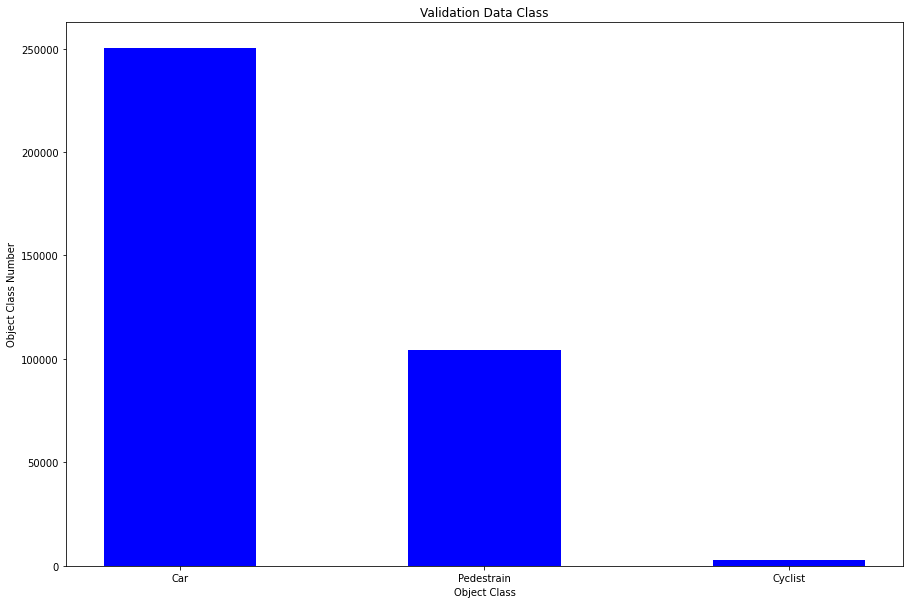

In [8]:
obj_classes          = ['Car','Pedestrain', 'Cyclist']
Obj_classes_num_val  = [groundtruth_obj_class_Val[1], groundtruth_obj_class_Val[2], groundtruth_obj_class_Val[4]] 
fig = plt.figure(figsize = (15,10))
plt.bar(obj_classes, Obj_classes_num_val, color = 'blue', width = 0.5)
plt.xlabel("Object Class")
plt.ylabel("Object Class Number")
plt.title("Validation Data Class")

plt.show()